# Advance DataBase Systems Project 
### --------------------------------------------------------------------------

# This project is focused on the data analysis and visualiation of a dataset on the Olympics games from the year 1896 to 2016.

### Jaimin Patel    -   110017550
### Soham Patel    -   110017511
### Parshwa Shah -   110021970

# --------------------------------------------------------------------------------------------------------------
    

# Including The Libraries that will be required for the data visualization 

In [1]:
# First of all we will include the libraries that are needed to perform the data visualization

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import itertools
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud,STOPWORDS
import io
import base64
from mpl_toolkits.mplot3d import Axes3D
#from mpl_toolkits.basemap import Basemap
import folium
import folium.plugins
import os
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

# Importing datasets
## 1. Athlete Events Data
## 2. Regions Data
## 3. Host Country Data

In [102]:
data = pd.read_csv('C:/Users/jaimi/Downloads/120years/athlete_events.csv')
regions = pd.read_csv('C:/Users/jaimi/Downloads/120years/noc_regions.csv')
events  = data.merge(regions[["NOC","region"]],left_on="NOC",right_on="NOC",how = "left")
host    = pd.read_csv(r"C:/Users/jaimi/Downloads/120years/host.csv",encoding='windows-1252')

# display ("EVENTS")
# display (events.head().style.set_properties(**{"background-color" : "black",
#                                                "color" : "lawngreen"}))

In [103]:
#Data Manipulation

#replace gender values
events["Sex"] = events["Sex"].map({"M":"MALE","F":"FEMALE"})

#replacing strings
events["region"] =events["region"].str.replace("Boliva","Bolivia")

#Grouping similar sports
def sport_category(events) :
    
    skating   = ['Speed Skating','Figure Skating','Short Track Speed Skating']
    skiing    = [ 'Cross Country Skiing', 'Alpine Skiing','Nordic Combined',
                 'Freestyle Skiing', 'Ski Jumping','Snowboarding', 'Alpinism']
    Bobsleigh = ['Bobsleigh','Skeleton']
    aquatics  =  ['Swimming','Synchronized Swimming','Diving','Water Polo']
    volley    =  ['Volleyball','Beach Volleyball']
    gymnastic =  ['Gymnastics','Rhythmic Gymnastics', 'Trampolining']
    
    for i in skating :
        if events["Sport"] == i :
            return "Skating"
        
    for i in skiing :
        if events["Sport"] == i :
            return "Skiing"
    
    for i in Bobsleigh :
        if events["Sport"] == i :
            return "Bobsleigh"
    
    for i in aquatics :
        if events["Sport"] == i :
            return "Aquatics"
    
    for i in volley :
        if events["Sport"] == i :
            return "Volley"
        
    for i in gymnastic :
        if events["Sport"] == i :
            return "Gymnastic"
    
    else : 
        return events["Sport"]

events["Sport_category"] = events.apply(lambda events : sport_category(events) ,axis = 1)



#Creating binary columns for medals\
def gold_m(events)  :
    if events["Medal"] == "Gold" :
        return 1 
    else :
        return 0
def silver_m(events)  :
    if events["Medal"] == "Silver" :
        return 1 
    else :
        return 0
def bronze_m(events)  :
    if events["Medal"] == "Bronze" :
        return 1 
    else :
        return 0
    
events["Gold"]   = events.apply(lambda events:gold_m(events),axis = 1) 
events["Silver"] = events.apply(lambda events:silver_m(events),axis = 1) 
events["Bronze"] = events.apply(lambda events:bronze_m(events),axis = 1) 
events["Total"] = events["Gold"] + events["Silver"] +events["Bronze"]

#splitting summer and winter olympics

summer = events[events["Season"] == "Summer"]
winter = events[events["Season"] == "Winter"]

#Host cities data manipulation

host["Year"] =  host["Year"].fillna(method= "ffill")
host["Year"] = host["Year"].astype(int)
host["Country"] = host["Country"].str.replace("\xa0","")
host["Country"] = host["Country"].str.replace("Nazi Germany","Germany")
host["Country"] = host["Country"].str.replace("West Germany","Germany")
host["Summer (Olympiad)"] = host["Summer (Olympiad)"].fillna("WINTER")
host["Winter"] = host["Winter"].fillna("SUMMER")


# ##3
def lab(host) :
    if host["Summer (Olympiad)"] == "WINTER" :
        return "WINTER"
    if host["Winter"] == "SUMMER" :
        return "SUMMER"
    
host["season"] = host.apply(lambda host:lab(host),axis = 1)
host = host[['City', 'Country',  'Year', 'latitude','longitude', 'season']]


host_s = host[host["season"] == "SUMMER"]
host_w = host[host["season"] == "WINTER"]

In [104]:
BLUE = '\033[94m'
BOLD = '\033[1m'
UNDERLINE = '\033[4m'
BackgroundBlack = "\033[40m"
BackgroundBlue         = "\033[44m"
Magenta    = "\033[35m"
Green        = "\033[32m"
Yellow       = "\033[33m"
END = '\033[0m'

##summer 
print ("Summer Games")
print ("-------------")
print(Magenta+UNDERLINE+BOLD+"Games           : " , summer["Year"].nunique())
print("Host Countries  : ",  host[host["season"] == "SUMMER"]["Country"].nunique())
print("No of Sports    : ",  summer["Sport"].nunique())
print("No of Events    : ",  summer["Event"].nunique())
s_male_ev   = summer[summer["Sex"] == "MALE"]["Event"].unique().tolist()
s_female_ev = summer[summer["Sex"] == "FEMALE"]["Event"].unique().tolist()
s_both_ev   = [x for x in s_male_ev if x in s_female_ev]
s_male_events   = [x for x in s_male_ev if x not in s_both_ev]
s_female_events = [x for x in s_female_ev if x not in s_both_ev]
print("Events for female athletes : " , len(s_female_events))
print("Events for male athletes   : " , len(s_male_events))
print("Events for both genders    : " , len(s_both_ev))
print("Total NOC's     : ",  summer["NOC"].nunique())
print("Total Participant's  : ",  summer["ID"].nunique())
print("Female Participant's : ",  summer[summer["Sex"] == "FEMALE"]["ID"].nunique())
print("Male Participant's   : ",  summer[summer["Sex"] == "MALE"]["ID"].nunique())
print("Youngest Participant : ",summer.loc[summer["Age"].idxmin()]["Name"],
      " , Age - " , (summer.loc[summer["Age"].idxmin()]["Age"]).astype(int),
      " , Country - " ,summer.loc[summer["Age"].idxmin()]["region"] ,
      " , Year - " ,summer.loc[summer["Age"].idxmin()]["Year"])
print("Oldest Participant : ",summer.loc[summer["Age"].idxmax()]["Name"],
      " , Age - " , (summer.loc[summer["Age"].idxmax()]["Age"]).astype(int),
      " , Country - " ,summer.loc[summer["Age"].idxmax()]["region"] ,
      " , Year - " ,summer.loc[summer["Age"].idxmax()]["Year"])
s_med  = summer.groupby("Name")["Total"].sum().reset_index()
print("Most Medals (Athlete) : ", s_med.loc[s_med["Total"].idxmax()]["Name"])
s_med_c = summer.groupby("region")["Total"].sum().reset_index()
print("Most Medals (Country) : ",s_med_c.loc[s_med_c["Total"].idxmax()]["region"])


Summer Games
-------------
Games           :  29
Host Countries  :  19
No of Sports    :  52
No of Events    :  651
Events for female athletes :  160
Events for male athletes   :  437
Events for both genders    :  54
Total NOC's     :  230
Total Participant's  :  116776
Female Participant's :  28851
Male Participant's   :  87925
Youngest Participant :  Dimitrios Loundras  , Age -  10  , Country -  Greece  , Year -  1896
Oldest Participant :  John Quincy Adams Ward  , Age -  97  , Country -  USA  , Year -  1928
Most Medals (Athlete) :  Michael Fred Phelps, II
Most Medals (Country) :  USA


In [7]:
BLUE = '\033[94m'
BOLD = '\033[1m'
UNDERLINE = '\033[4m'
END = '\033[0m'
##winter
print ("Winter Games")
print ("-------------")
print(Magenta+UNDERLINE+BOLD+"Games           : " , winter["Year"].nunique())
print("Host Countries  : ",  host[host["season"] == "WINTER"]["Country"].nunique())
print("No of Sports    : ",  winter["Sport"].nunique())
print("No of Events    : ",  winter["Event"].nunique())

w_male_ev   = winter[winter["Sex"] == "MALE"]["Event"].unique().tolist()
w_female_ev = winter[winter["Sex"] == "FEMALE"]["Event"].unique().tolist()
w_both_ev   = [x for x in w_male_ev if x in w_female_ev]
w_male_events   = [x for x in w_male_ev if x not in w_both_ev]
w_female_events = [x for x in w_female_ev if x not in w_both_ev]
print("Events for female athletes : " , len(w_female_events))
print("Events for male athletes   : " , len(w_male_events))
print("Events for both genders    : " , len(w_both_ev))

print("Total NOC's     : ",  winter["NOC"].nunique())
print("Total Participant's  : ",  winter["ID"].nunique())
print("Female Participant's : ",  winter[winter["Sex"] == "FEMALE"]["ID"].nunique())
print("Male Participant's   : ",  winter[winter["Sex"] == "MALE"]["ID"].nunique())
print("Youngest Participant : ",winter.loc[winter["Age"].idxmin()]["Name"],
      " , Age - " , (winter.loc[winter["Age"].idxmin()]["Age"]).astype(int),
      " , Country - " ,winter.loc[winter["Age"].idxmin()]["region"] ,
      " , Year - " ,winter.loc[winter["Age"].idxmin()]["Year"])
print("Oldest Participant : ",winter.loc[winter["Age"].idxmax()]["Name"],
      " , Age - " , (winter.loc[winter["Age"].idxmax()]["Age"]).astype(int),
      " , Country - " ,winter.loc[winter["Age"].idxmax()]["region"] ,
      " , Year - " ,winter.loc[winter["Age"].idxmax()]["Year"])
w_med  = winter.groupby("Name")["Total"].sum().reset_index()
print("Most Medals (Athlete) : ", w_med.loc[w_med["Total"].idxmax()]["Name"])
w_med_c = winter.groupby("region")["Total"].sum().reset_index()
print("Most Medals (Country) : ",w_med_c.loc[w_med_c["Total"].idxmax()]["region"])

Winter Games
-------------
Games           :  22
Host Countries  :  12
No of Sports    :  17
No of Events    :  119
Events for female athletes :  52
Events for male athletes   :  62
Events for both genders    :  5
Total NOC's     :  119
Total Participant's  :  18958
Female Participant's :  5166
Male Participant's   :  13792
Youngest Participant :  Magdalena Cecilia Colledge  , Age -  11  , Country -  UK  , Year -  1932
Oldest Participant :  Carl August Verner Kronlund  , Age -  58  , Country -  Sweden  , Year -  1924
Most Medals (Athlete) :  Ole Einar Bjrndalen
Most Medals (Country) :  Russia


# Athlete participation
## Q. How does the athelete participation increased every olympic year?

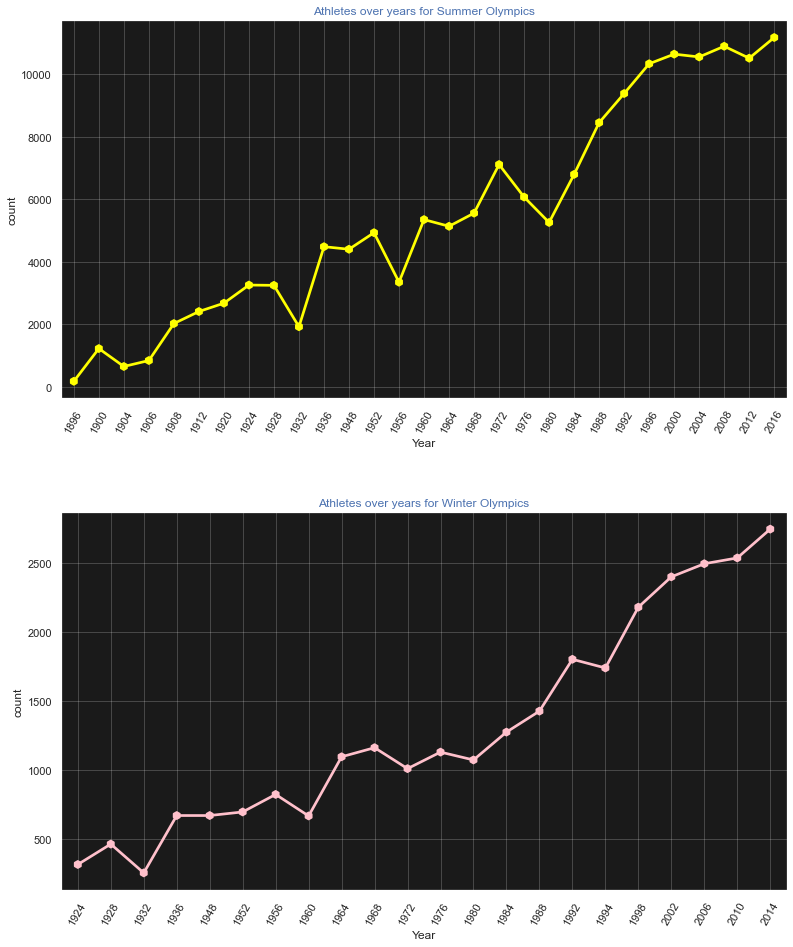

In [92]:
sum_c = summer.groupby(["Year"])["ID"].nunique().reset_index()
win_c = winter.groupby(["Year"])["ID"].nunique().reset_index()

fig = plt.figure(figsize=(13,16))
plt.subplot(211)
ax = sns.pointplot(x = sum_c["Year"] , y = sum_c["ID"],
                   color="Yellow",markers="h")
plt.xticks(rotation = 60)
ax.set_facecolor("k")
plt.grid(True,alpha=.2)
plt.ylabel("count")
plt.title("Athletes over years for Summer Olympics",color="b")

plt.subplot(212)
ax1 = sns.pointplot(x = win_c["Year"] , y = win_c["ID"],
                    color = "Pink",markers="h")
plt.xticks(rotation = 60)
ax1.set_facecolor("k")
plt.grid(True,alpha=.2)
plt.ylabel("count")
plt.title("Athletes over years for Winter Olympics",color="b")
plt.subplots_adjust(hspace = .3)
plt.show()

In [14]:
#importing data files

data = pd.read_csv(r"C:\Users\jaimi\Downloads\120years\athlete_events.csv")
regions = pd.read_csv(r"C:\Users\jaimi\Downloads\120years\noc_regions.csv")
host    = pd.read_csv(r"C:\Users\jaimi\Downloads\120years\host.csv", encoding='windows-1252')

In [15]:
#Understanding and collecting the data from above data files.
data.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [17]:
regions.head(5)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [18]:
regions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


# Joining the dataframes¶

In [19]:
merged=pd.merge(data,regions,on='NOC',how='left')
merged.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [20]:
"""Now, checking coloumn wise missing values in data"""
print(data.isnull().sum())

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64


In [21]:
"""according to above analysis, there are many null values in the columns like Age,Height, Weight and Medals.
In this case it is understood that not all the participants wins medals, thus we can replace those values with NW i.e.Not a Winner"""

data['Medal'].fillna('NW', inplace = True)

In [22]:
"""now let's check the results"""
print(data.isnull().sum())

ID            0
Name          0
Sex           0
Age        9474
Height    60171
Weight    62875
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal         0
dtype: int64


In [23]:
"""Now lets replace missing values in columns Age, Height and Weight values by their means."""
remaining_col = ['Age', 'Height', 'Weight']
for col in remaining_col:
    data[col] = data[col].fillna(np.mean(data[col]))
    data[col] = np.round(data[col],1)

In [24]:
"""now let's check the results"""
print(data.isnull().sum())

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64


In [25]:
"""now, let's see the gold medalist athletes of olympics and put them into new data frame"""
goldMedals = merged[(merged.Medal == 'Gold')]
goldMedals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


# Distribution of Gold Medals according to Age
===========================================================================

In [26]:
goldMedals=goldMedals[np.isfinite(goldMedals['Age'])]

Text(0.5, 1.0, 'Distribution of Gold Medals')

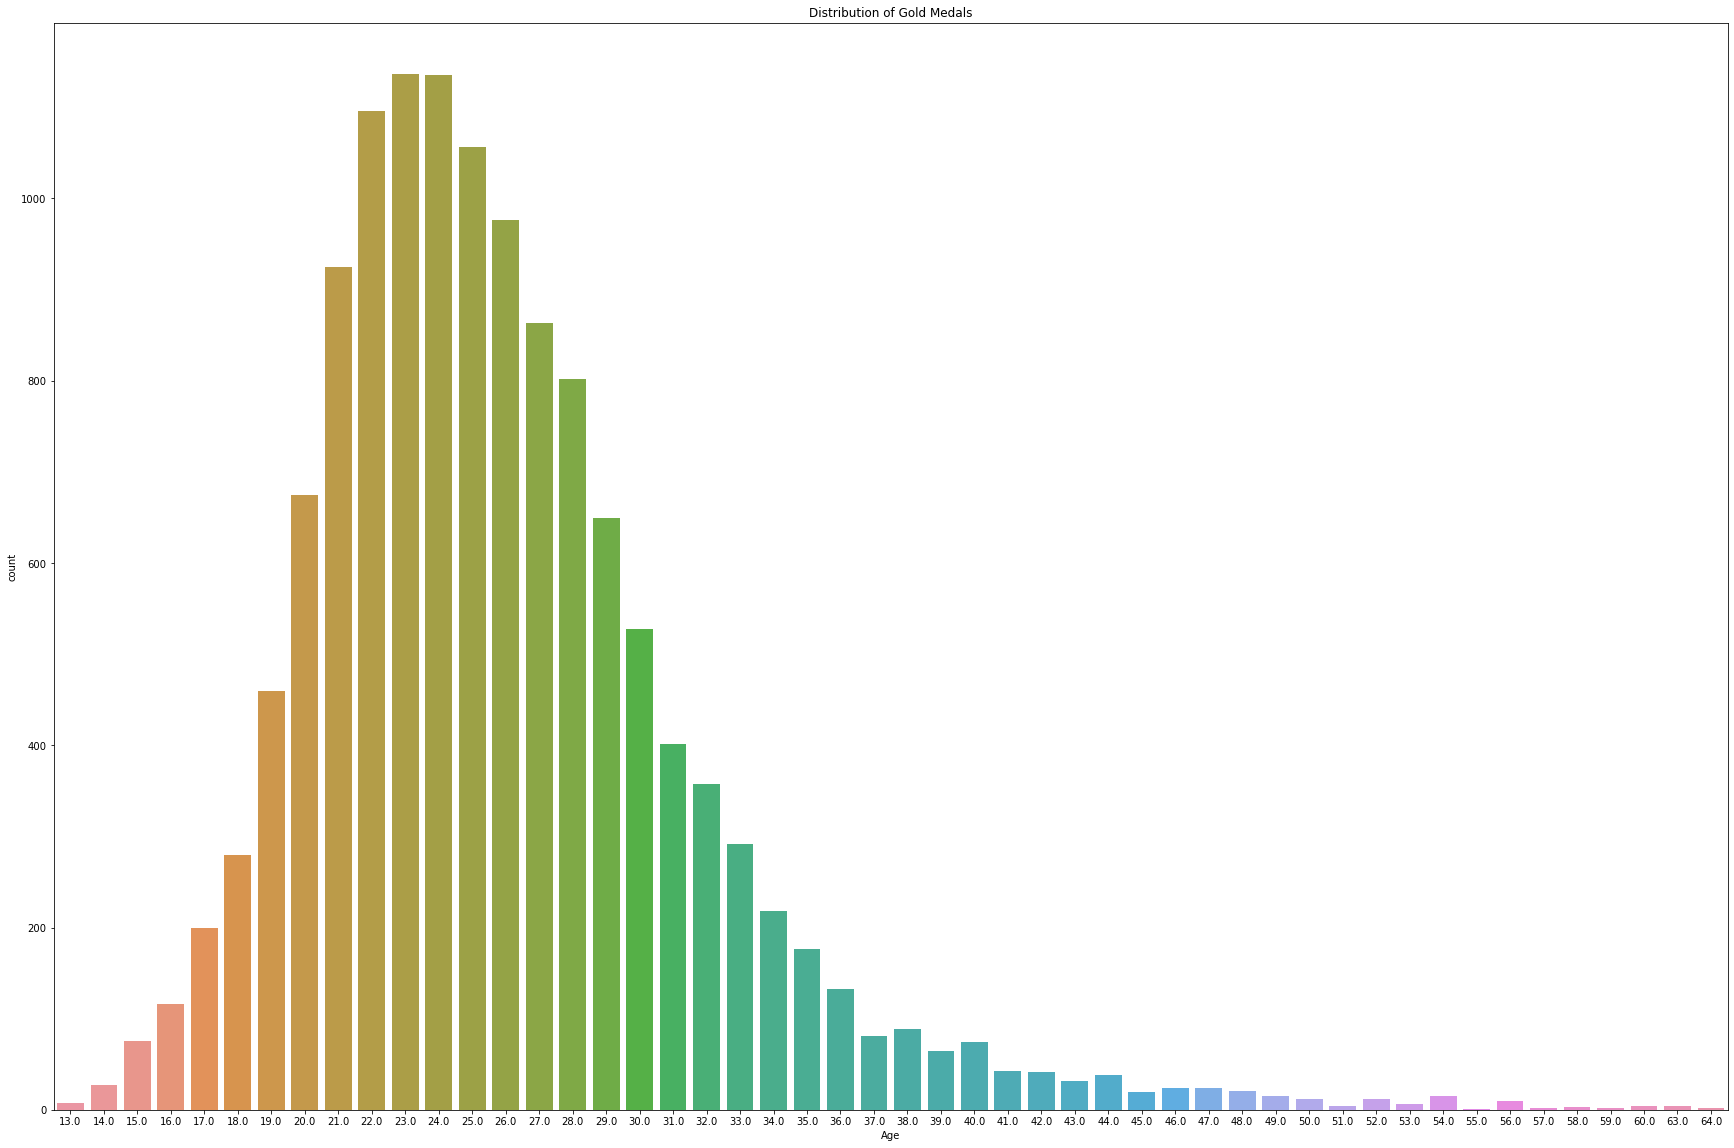

In [31]:
# """We can now create a countplot to see the result of our work:
#     --> this bar graph will project the age of athletes who won gold medals during various games of olympics.
# """
plt.figure(figsize=(30, 20))
plt.tight_layout()

sns.countplot(goldMedals['Age'])
plt.title('Distribution of Gold Medals')

# Distribution of Silver Medals according to Age

In [32]:
"""now, let's see the silver medalist athletes of olympics and put them into new data frame"""
silverMedals = merged[(merged.Medal == 'Silver')]
silverMedals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
63,20,Kjetil Andr Aamodt,M,22.0,176.0,85.0,Norway,NOR,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Downhill,Silver,Norway,NaN
67,20,Kjetil Andr Aamodt,M,22.0,176.0,85.0,Norway,NOR,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Combined,Silver,Norway,NaN
86,25,Alf Lied Aanning,M,24.0,NaN,NaN,Norway,NOR,1920 Summer,1920,Summer,Antwerpen,Gymnastics,"Gymnastics Men's Team All-Around, Free System",Silver,Norway,NaN
92,30,Pepijn Aardewijn,M,26.0,189.0,72.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Rowing,Rowing Men's Lightweight Double Sculls,Silver,Netherlands,NaN
106,38,Karl Jan Aas,M,20.0,NaN,NaN,Norway,NOR,1920 Summer,1920,Summer,Antwerpen,Gymnastics,"Gymnastics Men's Team All-Around, Free System",Silver,Norway,NaN


In [33]:
silverMedals=silverMedals[np.isfinite(silverMedals['Age'])]

Text(0.5, 1.0, 'Distribution of Silver Medals')

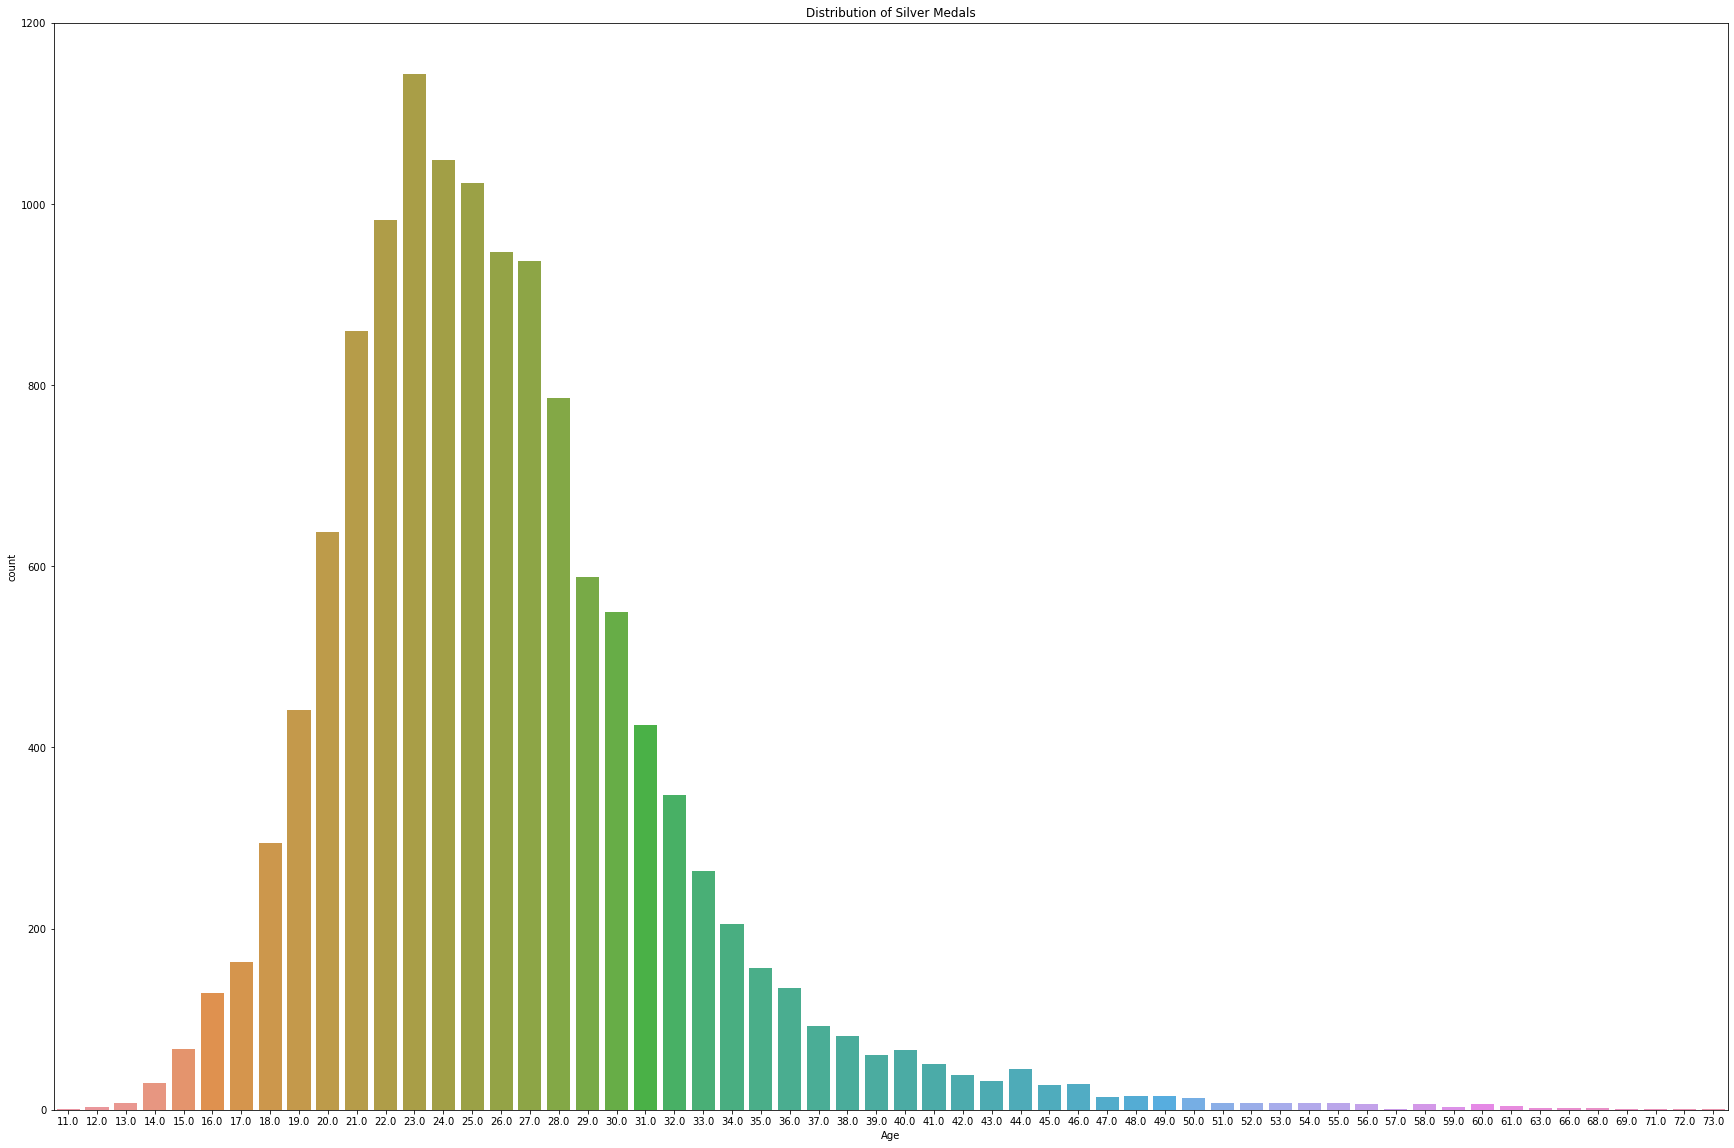

In [34]:
plt.figure(figsize=(30, 20))
plt.tight_layout()

sns.countplot(silverMedals['Age'])
plt.title('Distribution of Silver Medals')

# Distribution of Bronze Medals according to Age

In [35]:
"""now, let's see the gold medalist athletes of olympics and put them into new data frame"""
bronzeMedals = merged[(merged.Medal == 'Bronze')]
bronzeMedals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland,NaN
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,Finland,NaN
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,Finland,NaN
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,Finland,NaN
50,17,Paavo Johannes Aaltonen,M,32.0,175.0,64.0,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Men's Team All-Around,Bronze,Finland,NaN


In [36]:
"""now let's combine all the winners into the single dataframe named winners."""
winners = pd.concat([goldMedals,silverMedals,bronzeMedals], axis=0)
winners.head() #with this you can see first few columns of winners dataframe
winners.tail() #with this you can see last few columns of winners dataframe

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
271032,135535,Claudia Antoinette Zwiers,F,22.0,181.0,78.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Judo,Judo Women's Middleweight,Bronze,Netherlands,NaN
271048,135545,Henk Jan Zwolle,M,27.0,197.0,93.0,Netherlands,NED,1992 Summer,1992,Summer,Barcelona,Rowing,Rowing Men's Double Sculls,Bronze,Netherlands,NaN
271080,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze,Russia,NaN
271082,135554,Bogusaw Zych,M,28.0,182.0,82.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Fencing,"Fencing Men's Foil, Team",Bronze,Poland,NaN
271102,135563,Olesya Nikolayevna Zykina,F,19.0,171.0,64.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze,Russia,NaN


In [37]:
"""let's check if the new data frame have any null values"""
winners.isnull().sum()

ID            0
Name          0
Sex           0
Age         289
Height     8284
Weight     8907
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal         0
region        9
notes     38795
dtype: int64

In [38]:
"""Now lets replace missing values in columns Age, Height and Weight values by their means."""
remaining_col = ['Age', 'Height', 'Weight']
for col in remaining_col:
    winners[col] = winners[col].fillna(np.mean(winners[col]))
    winners[col] = np.round(winners[col],1)

In [39]:
"""lets check the null values again(now it should show 0 in the columns Age,height and Weight)"""
winners.isnull().sum()

ID            0
Name          0
Sex           0
Age           0
Height        0
Weight        0
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal         0
region        9
notes     38795
dtype: int64

In [40]:
# """now we can finally plot the winners and their age in form of graph."""
# plt.figure(figsize=(30, 20))
# plt.tight_layout()
# sns.countplot(winners['Age'])
# plt.title('Distribution of winners and their age.')

In [41]:
"""According to the above graph it seems that most of the winners are of young age.
let's count the nubers of winners who are of age 20 and below."""

winners['ID'][winners['Age']<=30].count()

32841

In [42]:
"""Also, there are few winners which are senior citizens i.e. age more than 60"""
winners['ID'][winners['Age']>=50].count()

236

In [43]:
"""Now lets create dataframe which includes winners with their respective sports and have age more than 60 and make visualization ofthe same."""
old_winners = winners['Sport'][winners['Age'] > 50]

Text(0.5, 1.0, 'Athletes who are above 50 and winners.')

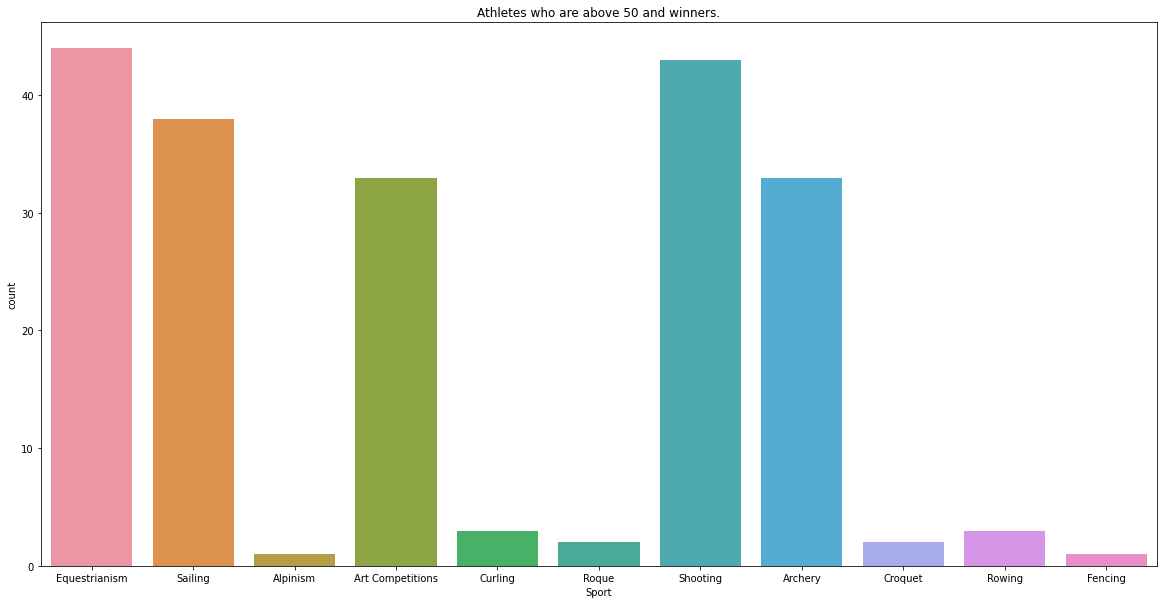

In [44]:
plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.countplot(old_winners)
plt.title('Athletes who are above 50 and winners.')

In [45]:
"""Now let's find out who is the oldest winner and how many are there of that age."""
winners['Age'].max()
winners[winners['Age']==73]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
44584,22984,John (Herbert Crawford-) Copley (Williamson-),M,73.0,177.6,73.8,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Graphic Arts",Silver,UK,NaN


In [46]:
"""now let's find out who is the youngest winner and how many are thereof that age."""
winners['Age'].min()


10.0

In [47]:
winners[winners['Age']<=12]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
79024,40129,Luigina Giavotti,F,11.0,177.6,73.8,Italy,ITA,1928 Summer,1928,Summer,Amsterdam,Gymnastics,Gymnastics Women's Team All-Around,Silver,Italy,NaN
148942,74712,Carla Marangoni,F,12.0,177.6,73.8,Italy,ITA,1928 Summer,1928,Summer,Amsterdam,Gymnastics,Gymnastics Women's Team All-Around,Silver,Italy,NaN
192507,96664,Dorothy Poynton-Hill (-Teuber),F,12.0,177.6,73.8,United States,USA,1928 Summer,1928,Summer,Amsterdam,Diving,Diving Women's Springboard,Silver,USA,NaN
251495,125944,Ines Vercesi,F,12.0,177.6,73.8,Italy,ITA,1928 Summer,1928,Summer,Amsterdam,Gymnastics,Gymnastics Women's Team All-Around,Silver,Italy,NaN
142882,71691,Dimitrios Loundras,M,10.0,177.6,73.8,Ethnikos Gymnastikos Syllogos,GRE,1896 Summer,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",Bronze,Greece,NaN
226019,113580,Inge Srensen (-Tabur),F,12.0,177.6,73.8,Denmark,DEN,1936 Summer,1936,Summer,Berlin,Swimming,Swimming Women's 200 metres Breaststroke,Bronze,Denmark,NaN
249803,125092,tienne Nol Henri Vandernotte,M,12.0,177.6,37.0,France,FRA,1936 Summer,1936,Summer,Berlin,Rowing,Rowing Men's Coxed Pairs,Bronze,France,NaN
249804,125092,tienne Nol Henri Vandernotte,M,12.0,177.6,37.0,France,FRA,1936 Summer,1936,Summer,Berlin,Rowing,Rowing Men's Coxed Fours,Bronze,France,NaN


In [48]:
"""Now let's explore what is the mean age of all the winners"""
winners.describe()

,ID,Age,Height,Weight,Year
count,39340.000000,39340.000000,39340.000000,39340.000000,39340.000000
mean,69390.053711,25.924990,177.565999,73.779776,1974.645196
std,38840.633957,5.892263,9.679956,13.205782,33.323627
min,4.000000,10.000000,136.000000,28.000000,1896.000000
25%,36512.000000,22.000000,172.000000,66.000000,1952.000000
50%,68973.000000,25.000000,177.600000,73.800000,1984.000000
75%,103435.000000,29.000000,183.000000,80.000000,2002.000000
max,135563.000000,73.000000,223.000000,182.000000,2016.000000


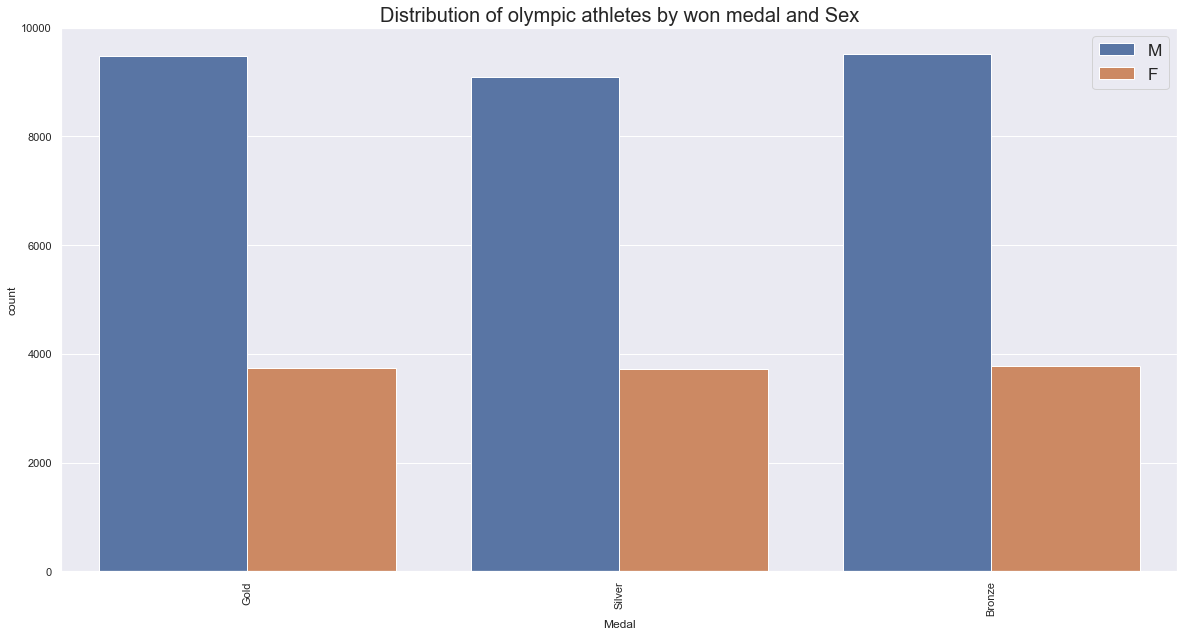

In [58]:
"""Now lets plot the winners by their gender and type of Medal won by the athletes."""

plt.figure(figsize=(20, 10))
sns.countplot(x= 'Medal', hue='Sex', data=winners )
plt.xticks(rotation = 90)
plt.legend(loc=1, fontsize='x-large')
plt.title('Distribution of olympic athletes by won medal and Sex', fontsize = 20)
plt.show()

In [59]:
# """height vs Weight of athletes and are they winners or not. if winners then what medals they won."""
# plt.figure(figsize=(20, 20))
# sns.scatterplot(x="Height", y="Weight", hue='Medal', data=data)
# plt.title('Height VS Weight of Olympics Athletes', fontsize=20)
# plt.show()

# womens in olympics( Summer)

## Q. How the participation of women evolved in every olympic? 


In [60]:
womenInOlympics = merged[(merged.Sex == 'F') & (merged.Season == 'Summer')]


In [61]:
#womenInOlympics.head(10)

Text(0.5, 1.0, 'Women medals per edition of the Games')

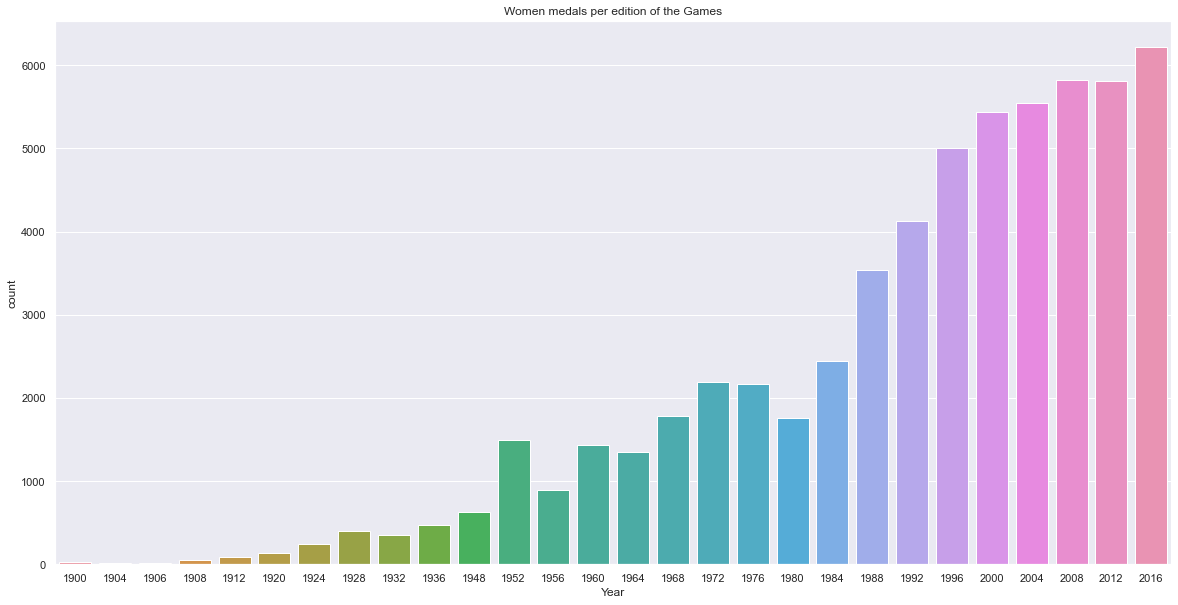

In [62]:
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', data=womenInOlympics)
plt.title('Women medals per edition of the Games')

In [63]:
womenInOlympics.loc[womenInOlympics['Year'] == 1900].head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
283,150,Margaret Ives Abbott (-Dunne),F,23.0,NaN,NaN,United States,USA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,Gold,USA,NaN
284,151,Mary Perkins Ives Abbott (Perkins-),F,42.0,NaN,NaN,United States,USA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,NaN,USA,NaN
30535,15740,A. Brun,F,NaN,NaN,NaN,France,FRA,1900 Summer,1900,Summer,Paris,Golf,Golf Women's Individual,NaN,France,NaN
44448,22925,Charlotte Reinagle Cooper (-Sterry),F,29.0,NaN,NaN,Great Britain,GBR,1900 Summer,1900,Summer,Paris,Tennis,Tennis Women's Singles,Gold,UK,NaN
44449,22925,Charlotte Reinagle Cooper (-Sterry),F,29.0,NaN,NaN,Great Britain,GBR,1900 Summer,1900,Summer,Paris,Tennis,Tennis Mixed Doubles,Gold,UK,NaN
51667,26559,Hlne de Pourtals (Barbey-),F,32.0,NaN,NaN,Lerina,SUI,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed Open,NaN,Switzerland,NaN
51668,26559,Hlne de Pourtals (Barbey-),F,32.0,NaN,NaN,Lerina,SUI,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 1-2 Ton,Gold,Switzerland,NaN
51669,26559,Hlne de Pourtals (Barbey-),F,32.0,NaN,NaN,Lerina,SUI,1900 Summer,1900,Summer,Paris,Sailing,Sailing Mixed 1-2 Ton,Silver,Switzerland,NaN
54280,27851,Mme. Desprs,F,NaN,NaN,NaN,France,FRA,1900 Summer,1900,Summer,Paris,Croquet,"Croquet Mixed Singles, One Ball",NaN,France,NaN
54281,27851,Mme. Desprs,F,NaN,NaN,NaN,France,FRA,1900 Summer,1900,Summer,Paris,Croquet,"Croquet Mixed Singles, Two Balls",NaN,France,NaN


In [64]:
womenInOlympics['ID'].loc[womenInOlympics['Year'] == 1900].count()

33

In [65]:
womenInOlympics['ID'].loc[womenInOlympics['Year'] == 2016].count()

6223

# Countries Participation in Olympic 

#  Medals per country 


# Top 10 countries for gold medals

In [66]:
goldMedals.region.value_counts().reset_index(name='Medal').head(10)

,index,Medal
0,USA,2627
1,Russia,1599
2,Germany,1293
3,UK,657
4,Italy,567
5,France,491
6,Sweden,479
7,Canada,461
8,Hungary,432
9,Norway,378


Text(0.5, 1.0, 'Medals per Country')

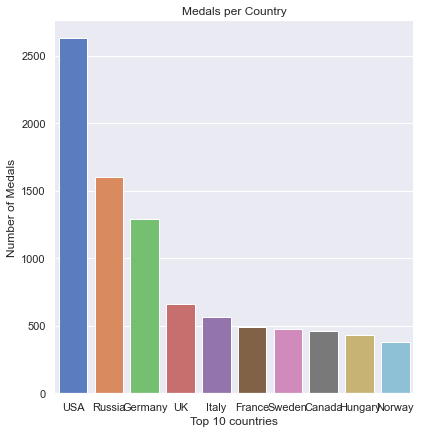

In [67]:
totalGoldMedals = goldMedals.region.value_counts().reset_index(name='Medal').head(10)
g = sns.catplot(x="index", y="Medal", data=totalGoldMedals,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_xlabels("Top 10 countries")
g.set_ylabels("Number of Medals")
plt.title('Medals per Country')

# Top 10 countries for Silver medals

In [68]:
silverMedals.region.value_counts().reset_index(name='Medal').head(10)

,index,Medal
0,USA,1619
1,Germany,1176
2,Russia,1169
3,UK,684
4,France,563
5,Italy,528
6,Sweden,522
7,Australia,456
8,Canada,432
9,Norway,361


Text(0.5, 1.0, 'Silver Medals per Country')

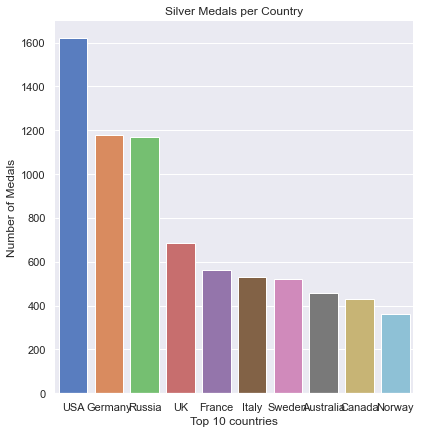

In [69]:
totalSilverMedals = silverMedals.region.value_counts().reset_index(name='Medal').head(10)
g = sns.catplot(x="index", y="Medal", data=totalSilverMedals,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_xlabels("Top 10 countries")
g.set_ylabels("Number of Medals")
plt.title('Silver Medals per Country')

# Top 10 countries for Bronze medals

In [70]:
bronzeMedals.NOC.value_counts().reset_index(name='Medel').head(10)

,index,Medel
0,USA,1358
1,GER,746
2,URS,689
3,FRA,666
4,GBR,651
5,SWE,535
6,ITA,531
7,AUS,517
8,CAN,451
9,FIN,432


Text(0.5, 1.0, 'Bronze Medals per Country')

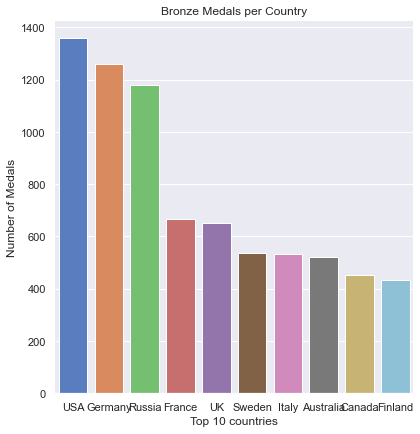

In [71]:
totalBronzeMedals = bronzeMedals.region.value_counts().reset_index(name='Medal').head(10)
g = sns.catplot(x="index", y="Medal", data=totalBronzeMedals,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_xlabels("Top 10 countries")
g.set_ylabels("Number of Medals")
plt.title('Bronze Medals per Country')

# 8. Disciplines with the greatest number of Gold Medals

# Let's create a dataframe to filter the gold medals only for the USA.

In [72]:
goldMedalsUSA = goldMedals.loc[goldMedals['NOC'] == 'USA']

In [73]:
"""Done! Now, we can count the medals per discipline:"""

'Done! Now, we can count the medals per discipline:'

In [74]:
goldMedalsUSA.Event.value_counts().reset_index(name='Medal').head(10)

,index,Medal
0,Basketball Men's Basketball,186
1,Swimming Men's 4 x 200 metres Freestyle Relay,111
2,Swimming Men's 4 x 100 metres Medley Relay,108
3,Rowing Men's Coxed Eights,107
4,Basketball Women's Basketball,95
5,Athletics Men's 4 x 400 metres Relay,81
6,Swimming Women's 4 x 100 metres Medley Relay,79
7,Swimming Women's 4 x 100 metres Freestyle Relay,78
8,Football Women's Football,66
9,Athletics Men's 4 x 100 metres Relay,63


# RUSSIA

In [75]:
goldMedalsRUS = goldMedals.loc[goldMedals['NOC'] == 'RUS']

In [76]:
goldMedalsRUS.Event.value_counts().reset_index(name='Medal').head(20)

,index,Medal
0,Synchronized Swimming Women's Team,44
1,Rhythmic Gymnastics Women's Group,29
2,Handball Women's Handball,15
3,Handball Men's Handball,15
4,Volleyball Men's Volleyball,12
5,Cross Country Skiing Women's 4 x 5 kilometres ...,12
6,Figure Skating Mixed Pairs,10
7,Synchronized Swimming Women's Duet,10
8,Figure Skating Mixed Team,10
9,"Fencing Women's epee, Team",8


# Germany

In [77]:
goldMedalsGER = goldMedals.loc[goldMedals['NOC'] == 'GER']

In [78]:
goldMedalsGER.Event.value_counts().reset_index(name='Medal').head(20)

,index,Medal
0,Hockey Men's Hockey,49
1,"Equestrianism Mixed Dressage, Team",26
2,Rowing Men's Coxed Fours,25
3,Handball Men's Handball,22
4,Bobsleigh Men's Four,20
5,Rowing Women's Quadruple Sculls,20
6,Rowing Men's Coxed Eights,18
7,Football Women's Football,18
8,"Equestrianism Mixed Jumping, Team",17
9,"Canoeing Women's Kayak Fours, 500 metres",16


In [79]:
"""But hey, wait a minute: We are reviewing a list of athletes, but maybe we are counting the medal of each member of the team instead of counting the medals per team.

Let's slice the dataframe using only the data of male athletes to better review it:"""
basketballGoldUSA = goldMedalsUSA.loc[(goldMedalsUSA['Sport'] == 'Basketball') & (goldMedalsUSA['Sex'] == 'M')].sort_values(['Year'])

In [80]:
#basketballGoldUSA.head(15)

In [84]:
# """What we supposed is true: the medals are not grouped by Edition/Team but we were counting the gold medals of each member of the team!

# Let's proceed grouping by year the athletes - the idea is to create a new dataframe to make a pre-filter using only the first record for each member of the team."""
# # groupedBasketUSA = basketballGoldUSA.groupby(['Year']).first()
# # groupedBasketUSA


In [86]:
groupedBasketUSA['ID'].count()

15

In [87]:
"""And so we have 15 records - cross-checking with the related Wikipedia page it seems that our filtering operation has obtained the desired result!"""

'And so we have 15 records - cross-checking with the related Wikipedia page it seems that our filtering operation has obtained the desired result!'

# 10. Evolution of the Olympics over time

## We will now try to answer the following questions:

### How the number of athletes/countries varied along time ?
### How the proportion of Men/Women varied with time ?
### How about mean age, weight and height along time ?

* 10.1 Variation of male/female athletes over time (Summer Games) *

We will now create two dataframes dividing the population of our dataset using Sex and Season (we would like to review only the summer games)

In [66]:
MenOverTime = merged[(merged.Sex == 'M') & (merged.Season == 'Summer')]
WomenOverTime = merged[(merged.Sex == 'F') & (merged.Season == 'Summer')]

In [67]:
MenOverTime.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
29,10,"Einar Ferdinand ""Einari"" Aalto",M,26.0,NaN,NaN,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,NaN,Finland,NaN


Okay, at this time we are ready to create the plots.

The first one is for men, the second for women:

Text(0.5, 1.0, 'Variation of Male Athletes over time')

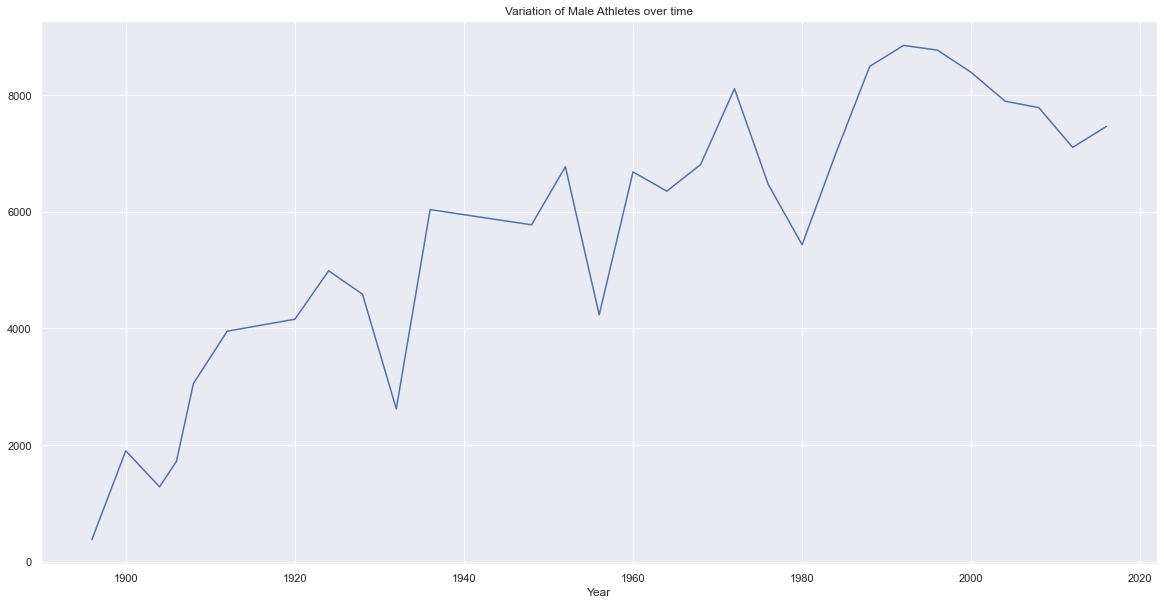

In [68]:
part = MenOverTime.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20, 10))
part.loc[:,'M'].plot()
plt.title('Variation of Male Athletes over time')

Text(0.5, 1.0, 'Variation of Female Athletes over time')

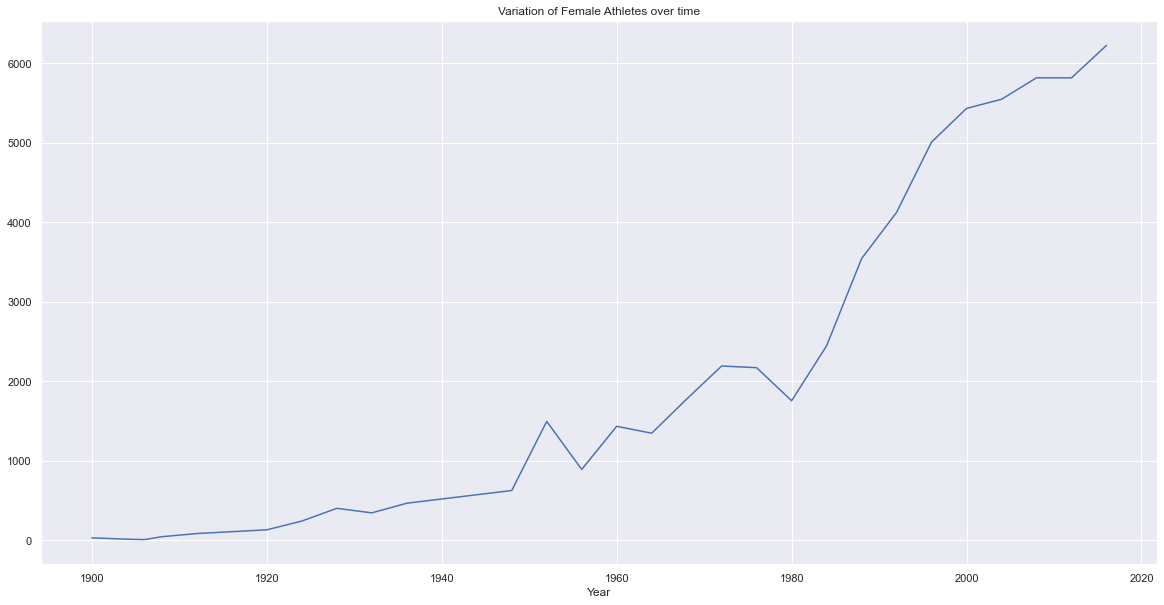

In [69]:
part = WomenOverTime.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20, 10))
part.loc[:,'F'].plot()
plt.title('Variation of Female Athletes over time')

# Gender Distribution

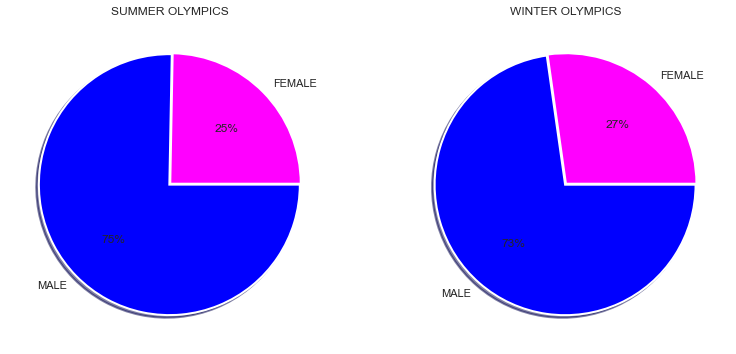

In [99]:
plt.figure(figsize=(13,6))
plt.subplot(121)
summer.groupby("Sex")["ID"].nunique().plot.pie(autopct = "%1.0f%%",
                                               wedgeprops = {"linewidth":2,"edgecolor":"w"},
                                              explode = [0,.01],shadow = True , 
                                               colors = ["magenta","blue"]) 
plt.ylabel("")
circ = plt.Circle((0,0),.0,color = "white")
plt.gca().add_artist(circ)
plt.title("SUMMER OLYMPICS")

plt.subplot(122)
winter.groupby("Sex")["ID"].nunique().plot.pie(autopct = "%1.0f%%",
                                               wedgeprops = {"linewidth":2,"edgecolor":"w"},
                                              explode = [0,.01],shadow = True , 
                                               colors = ["magenta","blue"]) 
plt.ylabel("")
circ = plt.Circle((0,0),.0,color = "white")
plt.gca().add_artist(circ)
plt.title("WINTER OLYMPICS")

plt.show()

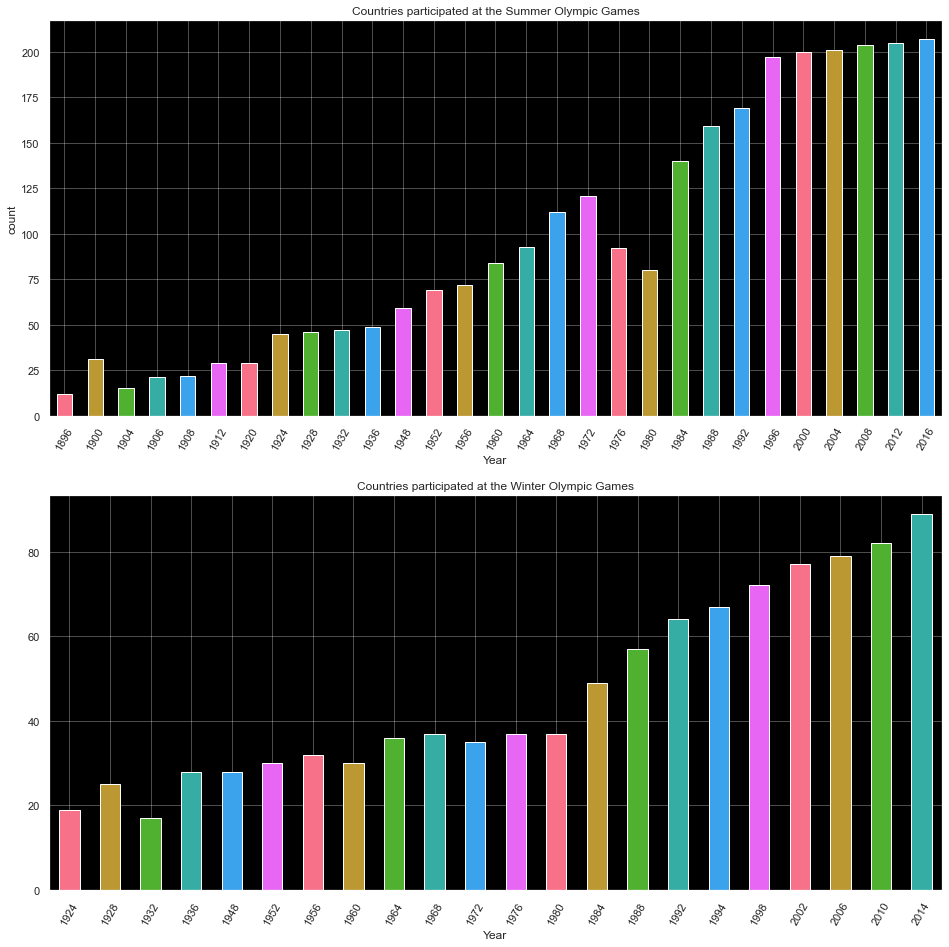

In [101]:
plt.figure(figsize=(16,16))
plt.subplot(211)
ax = summer.groupby("Year")["NOC"].nunique().plot(kind = "bar",
                                                 color = sns.color_palette("husl"),
                                                 linewidth = 1,
                                                  edgecolor=  "w"*summer["Year"].nunique())
plt.xticks(rotation = 60)
ax.set_facecolor("black")
plt.ylabel("count")
plt.title("Countries participated at the Summer Olympic Games")
plt.grid(True,alpha=.3)

plt.subplot(212)
ax1 = winter.groupby("Year")["NOC"].nunique().plot(kind = "bar",
                                                 color = sns.color_palette("husl"),
                                                 linewidth = 1,
                                                   edgecolor=  "w"*summer["Year"].nunique())
plt.xticks(rotation = 60)
ax1.set_facecolor("black")
plt.title("Countries participated at the Winter Olympic Games")
plt.grid(True,alpha=.3)
plt.show()